<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/mod27_Tarefa01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from google.colab import drive
drive.mount('/content/drive')

filename_features = "/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt"
filename_labels = "/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento Modelos com Pandas e Python/Árvore de classificação 2/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt"

# Carregar os nomes das features e resolver duplicatas
raw_features = pd.read_csv(filename_features, sep="\s+", header=None)[1]
feature_counts = Counter(raw_features)
seen = {}
features = []

for name in raw_features:
    if feature_counts[name] > 1:
        count = seen.get(name, 0) + 1
        seen[name] = count
        features.append(f"{name}_{count}")
    else:
        features.append(name)

# Carregar demais dados
labels = pd.read_csv(filename_labels, sep='\s+', header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None)[0]
X_train = pd.read_csv(filename_xtrain, sep='\s+', header=None, names=features)
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None)[0]
X_test = pd.read_csv(ffilename_xtest, sep='\s+', header=None, names=features)
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

Mounted at /content/drive


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [2]:
# Dividindo a base em Treino, Validação e Teste
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [3]:
# Treinando a Arvore
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)


CPU times: user 4min 21s, sys: 289 ms, total: 4min 22s
Wall time: 4min 31s


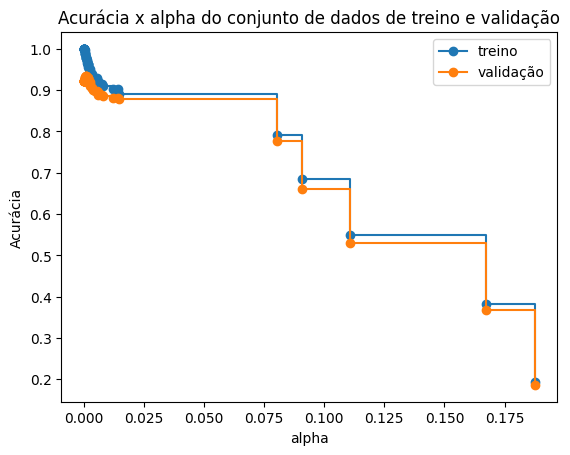

In [4]:
# Grafico Acuracia x Alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação", drawstyle="steps-post")
ax.legend()
plt.show()

In [5]:
# Acuracia do modelo
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

acc_train = train_scores[ind_melhor_arvore]
acc_valid = valid_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {acc_teste*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    97.9
Acurácia da melhor árvore na base de validação: 87.0
Acurácia da melhor árvore na base de teste:     87.0


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [6]:
%%time
pca = PCA(n_components=1)
pc_treino = pca.fit_transform(X_train)
pc_valida = pca.transform(X_valid)
pc_teste = pca.transform(X_test)


n = 1  # Certifique-se de definir aqui também
colunas = ['cp'+str(x+1) for x in range(n)]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_valid = pd.DataFrame(pc_valida[:, :n], columns=colunas)
pc_test  = pd.DataFrame(pc_teste[:, :n],  columns=colunas)


CPU times: user 415 ms, sys: 19.9 ms, total: 435 ms
Wall time: 240 ms


In [7]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

CPU times: user 6.31 s, sys: 41.9 ms, total: 6.35 s
Wall time: 6.45 s


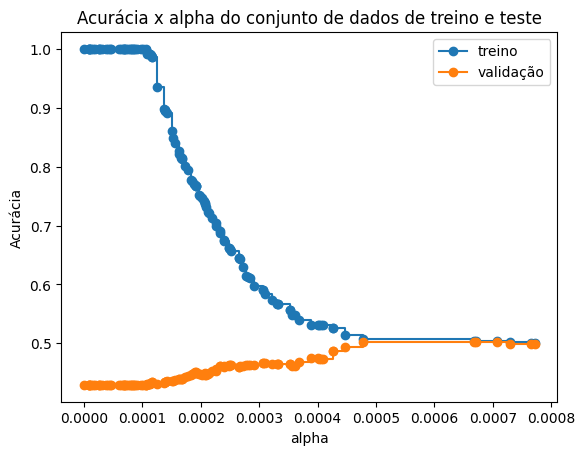

In [8]:
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
valid_scores = [clf.score(pc_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], valid_scores[:nx], marker='o', label="validação", drawstyle="steps-post")

ax.legend()
plt.show()

In [9]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_test, y_test)*100:.1f}')

melhor_arvore

Acurácia da melhor árvore na base de treino:    50.4
Acurácia da melhor árvore na base de validação: 50.2
Acurácia da melhor árvore na base de teste:     45.8


DecisionTreeClassifier(ccp_alpha=np.float64(0.0007067368213341182),
                       random_state=2360873)

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


## N = 2  

In [10]:
%%time
pca = PCA(n_components=2)
pc_treino = pca.fit_transform(X_train)
pc_valida = pca.transform(X_valid)
pc_teste = pca.transform(X_test)


n = 2  # Certifique-se de definir aqui também
colunas = ['cp'+str(x+1) for x in range(n)]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_valid = pd.DataFrame(pc_valida[:, :n], columns=colunas)
pc_test  = pd.DataFrame(pc_teste[:, :n],  columns=colunas)

CPU times: user 373 ms, sys: 7.98 ms, total: 381 ms
Wall time: 209 ms


In [11]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

CPU times: user 5.85 s, sys: 10 ms, total: 5.86 s
Wall time: 5.84 s


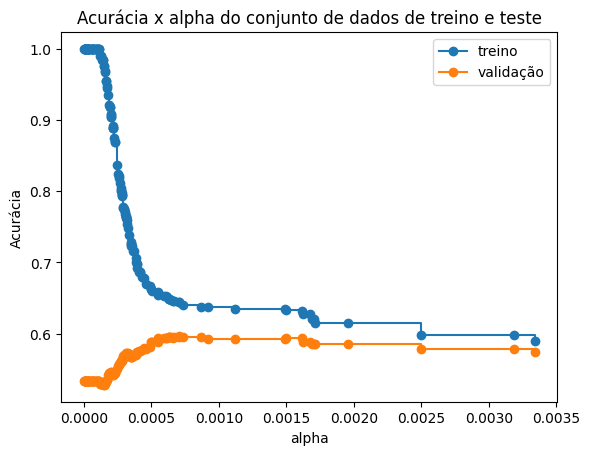

In [12]:
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
valid_scores = [clf.score(pc_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], valid_scores[:nx], marker='o', label="validação", drawstyle="steps-post")

ax.legend()
plt.show()

In [13]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_test, y_test)*100:.1f}')

melhor_arvore

Acurácia da melhor árvore na base de treino:    64.4
Acurácia da melhor árvore na base de validação: 59.6
Acurácia da melhor árvore na base de teste:     56.6


DecisionTreeClassifier(ccp_alpha=np.float64(0.0007038398418770953),
                       random_state=2360873)

## N = 5  

In [14]:
%%time
pca = PCA(n_components=5)
pc_treino = pca.fit_transform(X_train)
pc_valida = pca.transform(X_valid)
pc_teste = pca.transform(X_test)


n = 5  # Certifique-se de definir aqui também
colunas = ['cp'+str(x+1) for x in range(n)]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_valid = pd.DataFrame(pc_valida[:, :n], columns=colunas)
pc_test  = pd.DataFrame(pc_teste[:, :n],  columns=colunas)

CPU times: user 471 ms, sys: 2.99 ms, total: 474 ms
Wall time: 275 ms


In [15]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

CPU times: user 6.25 s, sys: 9.91 ms, total: 6.26 s
Wall time: 6.35 s


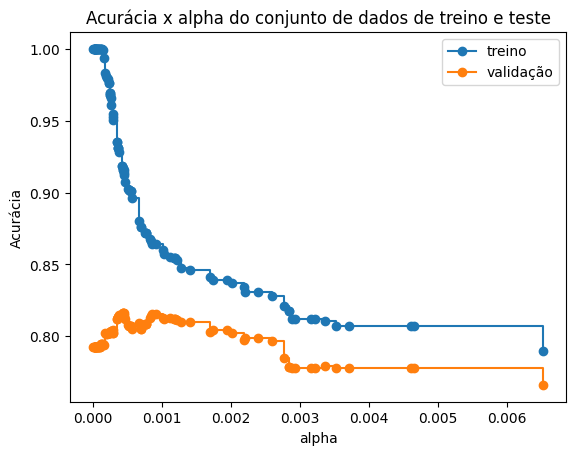

In [16]:
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
valid_scores = [clf.score(pc_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], valid_scores[:nx], marker='o', label="validação", drawstyle="steps-post")

ax.legend()
plt.show()

In [17]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_test, y_test)*100:.1f}')

melhor_arvore

Acurácia da melhor árvore na base de treino:    91.6
Acurácia da melhor árvore na base de validação: 81.6
Acurácia da melhor árvore na base de teste:     76.9


DecisionTreeClassifier(ccp_alpha=np.float64(0.0004482804101955354),
                       random_state=2360873)

## N = 10

In [18]:
%%time
pca = PCA(n_components=10)
pc_treino = pca.fit_transform(X_train)
pc_valida = pca.transform(X_valid)
pc_teste = pca.transform(X_test)


n = 10  # Certifique-se de definir aqui também
colunas = ['cp'+str(x+1) for x in range(n)]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_valid = pd.DataFrame(pc_valida[:, :n], columns=colunas)
pc_test  = pd.DataFrame(pc_teste[:, :n],  columns=colunas)

CPU times: user 1.89 s, sys: 3.97 ms, total: 1.89 s
Wall time: 1.04 s


In [19]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

CPU times: user 11 s, sys: 29.6 ms, total: 11 s
Wall time: 16.2 s


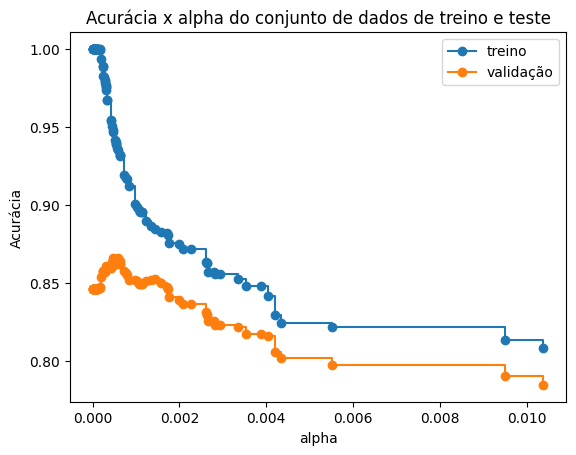

In [20]:
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
valid_scores = [clf.score(pc_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], valid_scores[:nx], marker='o', label="validação", drawstyle="steps-post")

ax.legend()
plt.show()

In [22]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_test, y_test)*100:.1f}')

melhor_arvore

Acurácia da melhor árvore na base de treino:    93.5
Acurácia da melhor árvore na base de validação: 86.6
Acurácia da melhor árvore na base de teste:     81.2


DecisionTreeClassifier(ccp_alpha=np.float64(0.0005885655063774253),
                       random_state=2360873)

## N = 50

In [23]:
%%time
pca = PCA(n_components=50)
pc_treino = pca.fit_transform(X_train)
pc_valida = pca.transform(X_valid)
pc_teste = pca.transform(X_test)


n = 50  # Certifique-se de definir aqui também
colunas = ['cp'+str(x+1) for x in range(n)]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_valid = pd.DataFrame(pc_valida[:, :n], columns=colunas)
pc_test  = pd.DataFrame(pc_teste[:, :n],  columns=colunas)

CPU times: user 2.29 s, sys: 5.01 ms, total: 2.3 s
Wall time: 1.19 s


In [24]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

CPU times: user 54 s, sys: 55.7 ms, total: 54 s
Wall time: 58.1 s


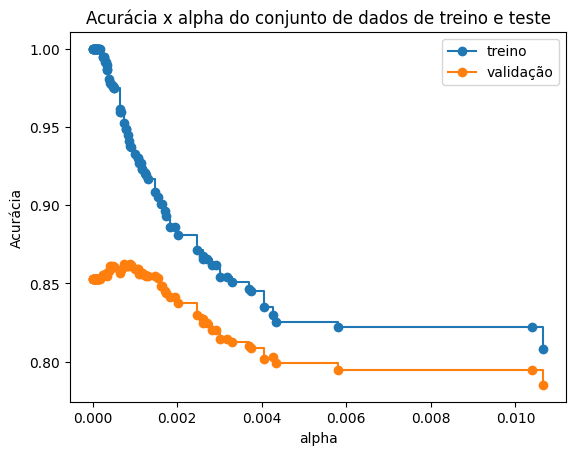

In [25]:
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
valid_scores = [clf.score(pc_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], valid_scores[:nx], marker='o', label="validação", drawstyle="steps-post")

ax.legend()
plt.show()

In [26]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_test, y_test)*100:.1f}')

melhor_arvore

Acurácia da melhor árvore na base de treino:    93.8
Acurácia da melhor árvore na base de validação: 86.2
Acurácia da melhor árvore na base de teste:     81.9


DecisionTreeClassifier(ccp_alpha=np.float64(0.0008902957760411508),
                       random_state=2360873)

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

## 📊 Avaliação de Modelos com PCA

### Tabela de Resultados

| Modelo (Quant. variáveis)   | Tempo    | Acurácia Treino | Acurácia Validação | Acurácia Teste |
|:--------:|--------:|----------------:|--------------------:|---------------:|
| N = todas |   271.0s |           97.9  |               87.0  |          87.0  |
| N = 1 |   6.45s |           50.4  |               50.2  |          45.8  |
| N = 2 |   5.84s |           64.4  |               59.6  |          56.6  |
| N = 5 |   6.35s |           91.6  |               81.6  |          76.9  |
| N = 10 |   16.2s |           93.5  |               86.6  |          81.2  |
| N = 50 |   58.1s |           93.8  |               86.2  |          81.9  |



### ✅ Conclusões

- Modelos com **N = 1 ou 2** componentes apresentaram **baixa acurácia**, indicando perda de informação relevante.
- A partir de **N = 5**, há um **aumento expressivo no desempenho**, com **redução drástica no tempo de execução**.
- Com **N = 10**, alcançamos um **ótimo equilíbrio entre tempo e desempenho**, com **acurácia de teste de 81.2%** em apenas 16s.
- O modelo com **todas as variáveis** obteve a **maior acurácia (87%)**, mas teve o **maior tempo de execução (271s)**.
- **Conclusão final:** PCA com **N entre 5 e 10** oferece uma **ótima relação custo-benefício**, sendo ideal para cenários onde tempo e desempenho precisam estar balanceados.